### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
def calcular_total(tienda):
    total = tienda['Precio'].sum()
    return float(total)
tiendas_lista = [tienda1, tienda2, tienda3, tienda4]

[1150.8804, 1116.3435, 1098.0196, 1038.3757]


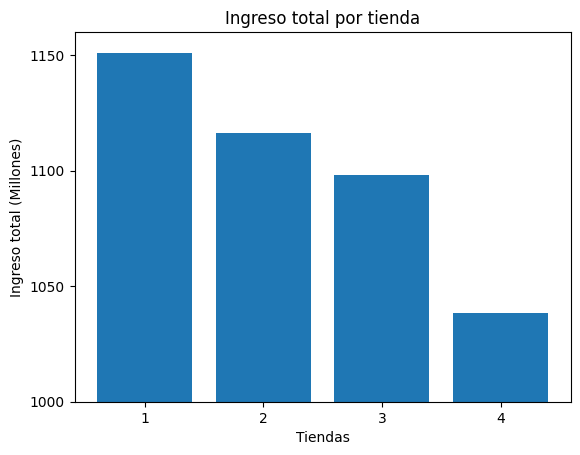

In [16]:
ingreso_total = [calcular_total(tienda) for tienda in tiendas_lista]

ingreso_total_plt = [ingreso/1000000 for ingreso in ingreso_total]
print(ingreso_total_plt)

plt.bar([1,2,3,4], ingreso_total_plt)
plt.xlabel("Tiendas")
plt.xticks([1,2,3,4])
plt.yticks([1000,1050,1100,1150])
plt.ylabel("Ingreso total (Millones)")
plt.ylim(1000,1160)
plt.title("Ingreso total por tienda")
plt.show()

# 2. Ventas por categoría

In [5]:
categorias = set()
for tienda in tiendas_lista:
  for categoria in tienda['Categoría del Producto']:
    categorias.add(categoria)
categorias = list(categorias)
print(categorias)

['Electrodomésticos', 'Libros', 'Juguetes', 'Artículos para el hogar', 'Deportes y diversión', 'Electrónicos', 'Muebles', 'Instrumentos musicales']


In [6]:
tiendas_llave = ["tienda1", "tienda2", "tienda3", "tienda4"]
n_ventas_categoria = {tiendas_llave[i]:{categorias[j]: int((tiendas_lista[i]['Categoría del Producto'] == categorias[j]).sum()) for j in range(0, len(categorias))} for i in range(0, len(tiendas_llave))} #Usando pandas
# n_ventas_categoria = {tiendas_llave[i]: {categorias[j]: list(tiendas_lista[i]['Categoría del Producto']).count(categorias[j]) for j in range(0, len(categorias))} for i in range(0, len(tiendas_llave))} #Usando listas
print(n_ventas_categoria)

{'tienda1': {'Electrodomésticos': 312, 'Libros': 173, 'Juguetes': 324, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Electrónicos': 448, 'Muebles': 465, 'Instrumentos musicales': 182}, 'tienda2': {'Electrodomésticos': 305, 'Libros': 197, 'Juguetes': 313, 'Artículos para el hogar': 181, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Muebles': 442, 'Instrumentos musicales': 224}, 'tienda3': {'Electrodomésticos': 278, 'Libros': 185, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Muebles': 499, 'Instrumentos musicales': 177}, 'tienda4': {'Electrodomésticos': 254, 'Libros': 187, 'Juguetes': 338, 'Artículos para el hogar': 201, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Muebles': 480, 'Instrumentos musicales': 170}}


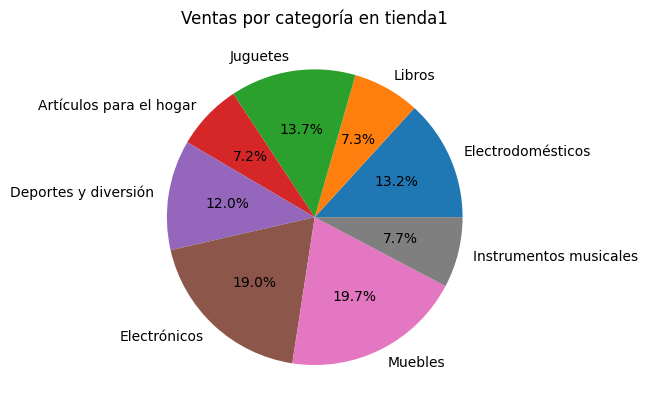

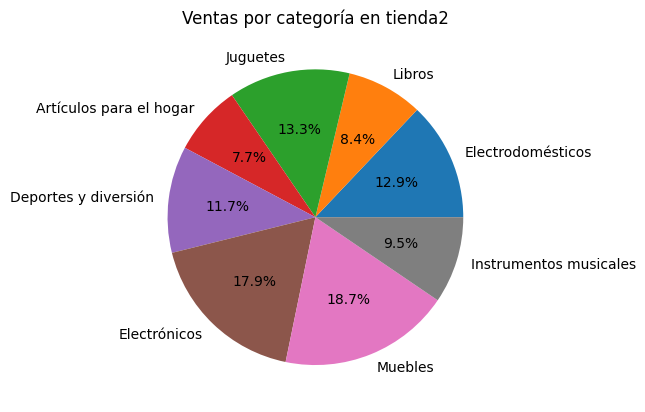

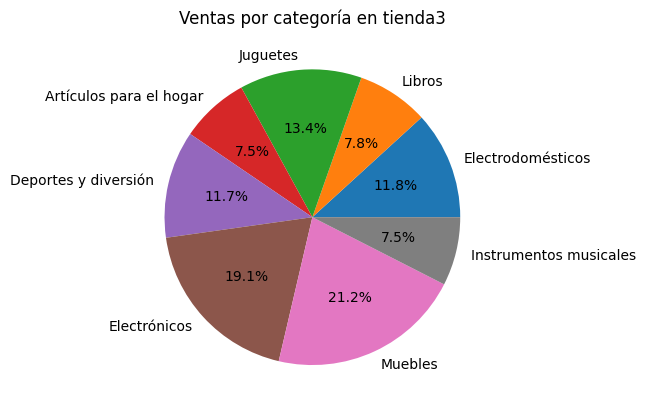

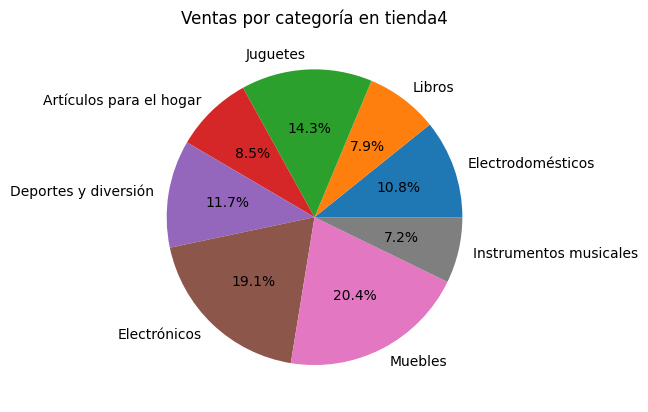

In [7]:
for tienda in tiendas_llave:
  plt.pie(n_ventas_categoria[tienda].values(), labels=n_ventas_categoria[tienda].keys(), autopct='%1.1f%%')
  plt.title(f"Ventas por categoría en {tienda}")
  plt.show()

# 3. Calificación promedio de la tienda


In [8]:
calificacion_tiendas = {tiendas_llave[i]: round(float(tiendas_lista[i]['Calificación'].mean()),2) for i in range(0, len(tiendas_llave))}
print(calificacion_tiendas)

{'tienda1': 3.98, 'tienda2': 4.04, 'tienda3': 4.05, 'tienda4': 4.0}


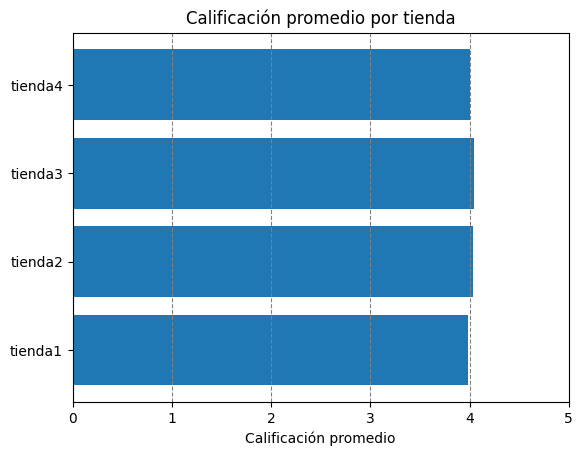

In [9]:
plt.barh(calificacion_tiendas.keys(), calificacion_tiendas.values())
plt.title("Calificación promedio por tienda")
plt.xlabel("Calificación promedio")
plt.xlim(0,5)
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.show()

# 4. Productos más y menos vendidos

In [10]:
productos = set()
for tienda in tiendas_lista:
  for producto in tienda['Producto']:
    productos.add(producto)
productos = list(productos)

n_productos_tiendas = {tiendas_llave[i]: [int((tiendas_lista[i]['Producto'] == producto).sum()) for producto in productos] for i in range(0, len(tiendas_llave))}
print(n_productos_tiendas)
print(len(productos))

['Asistente virtual', 'Bicicleta', 'Armario', 'Lavadora de ropa', 'Cuerda para saltar', 'Cama box', 'Refrigerador', 'Olla de presión', 'Smartwatch', 'Cama king', 'Kit de bancas', 'Dashboards con Power BI', 'Batería', 'Balón de baloncesto', 'Guitarra acústica', 'Pandereta', 'Ciencia de datos con Python', 'Balón de voleibol', 'TV LED UHD 4K', 'Vaso térmico', 'Mesa de comedor', 'Set de vasos', 'Mochila', 'Auriculares con micrófono', 'Ajedrez de madera', 'Auriculares', 'Sillón', 'Celular ABXY', 'Iphone 15', 'Mesa de centro', 'Bloques de construcción', 'Modelado predictivo', 'Secadora de ropa', 'Juego de mesa', 'Guitarra eléctrica', 'Sofá reclinable', 'Mesa de noche', 'Smart TV', 'Silla de oficina', 'Lavavajillas', 'Estufa', 'Iniciando en programación', 'Carrito de control remoto', 'Dinosaurio Rex', 'Muñeca bebé', 'Tablet ABXY', 'Microondas', 'Set de ollas', 'Impresora', 'Cubertería', 'Cubo mágico 8x8']
{'tienda1': [40, 54, 60, 47, 40, 44, 54, 35, 43, 44, 44, 42, 53, 55, 46, 36, 39, 42, 60,

In [11]:
from sys import is_finalizing
cantidad_productos_tiendas = {tiendas_llave[i]:{productos[j]: int((tiendas_lista[i]['Producto'] == productos[j]).sum()) for j in range(0, len(productos))} for i in range(0, len(tiendas_llave))}
#Número de productos vendidos en cada tienda
print(cantidad_productos_tiendas)

productos_mas_tiendas = {}
productos_menos_tiendas = {}

for tienda in tiendas_llave:
  copia_n = n_productos_tiendas
  copia_p = productos.copy()
  masVendidos = {}
  menosVendidos = {}
  for i in range(0,5):
    mas = max(copia_n[tienda])
    menos = min(copia_n[tienda])
    i_mas = copia_n[tienda].index(mas)
    i_menos = copia_n[tienda].index(menos)
    masVendidos[copia_p[i_mas]] = cantidad_productos_tiendas[tienda][copia_p[i_mas]]
    menosVendidos[copia_p[i_menos]] = cantidad_productos_tiendas[tienda][copia_p[i_menos]]

    copia_n[tienda].remove(mas)
    copia_n[tienda].remove(menos)
    copia_p.pop(i_mas)
    copia_p.pop(i_menos)
  productos_mas_tiendas[tienda] = masVendidos
  productos_menos_tiendas[tienda] = menosVendidos

print("Productos mas vendidos",productos_mas_tiendas)
print("Productos menos vendidos",productos_menos_tiendas)



{'tienda1': {'Asistente virtual': 40, 'Bicicleta': 54, 'Armario': 60, 'Lavadora de ropa': 47, 'Cuerda para saltar': 40, 'Cama box': 44, 'Refrigerador': 54, 'Olla de presión': 35, 'Smartwatch': 43, 'Cama king': 44, 'Kit de bancas': 44, 'Dashboards con Power BI': 42, 'Batería': 53, 'Balón de baloncesto': 55, 'Guitarra acústica': 46, 'Pandereta': 36, 'Ciencia de datos con Python': 39, 'Balón de voleibol': 42, 'TV LED UHD 4K': 60, 'Vaso térmico': 54, 'Mesa de comedor': 40, 'Set de vasos': 41, 'Mochila': 39, 'Auriculares con micrófono': 33, 'Ajedrez de madera': 49, 'Auriculares': 50, 'Sillón': 41, 'Celular ABXY': 33, 'Iphone 15': 49, 'Mesa de centro': 44, 'Bloques de construcción': 56, 'Modelado predictivo': 51, 'Secadora de ropa': 58, 'Juego de mesa': 43, 'Guitarra eléctrica': 47, 'Sofá reclinable': 46, 'Mesa de noche': 56, 'Smart TV': 44, 'Silla de oficina': 46, 'Lavavajillas': 48, 'Estufa': 45, 'Iniciando en programación': 41, 'Carrito de control remoto': 52, 'Dinosaurio Rex': 40, 'Muñec

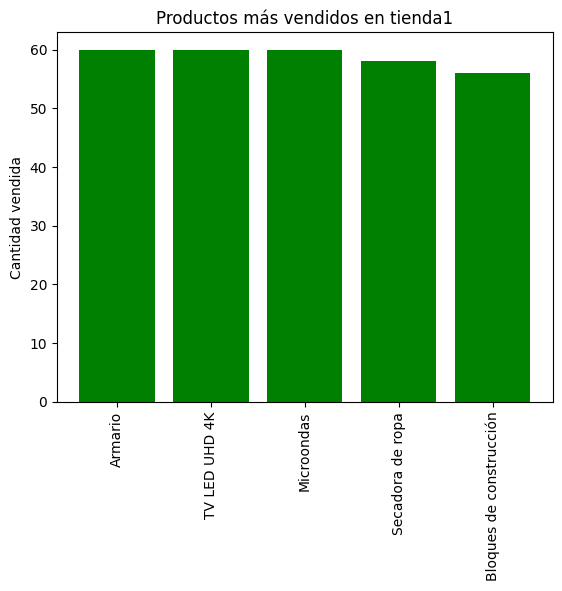

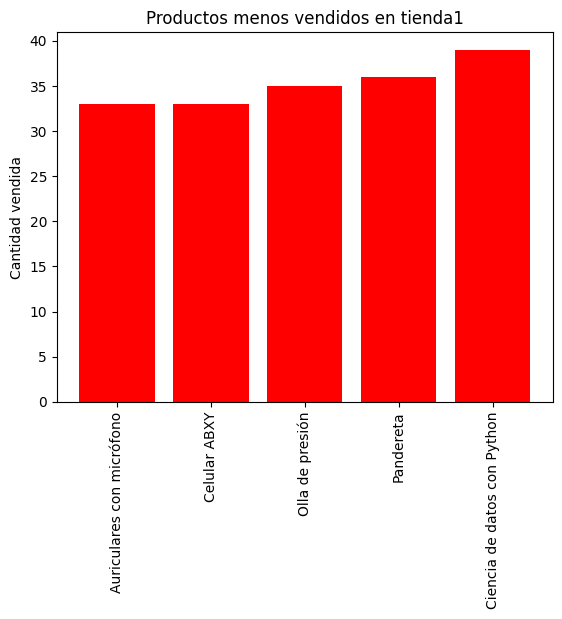

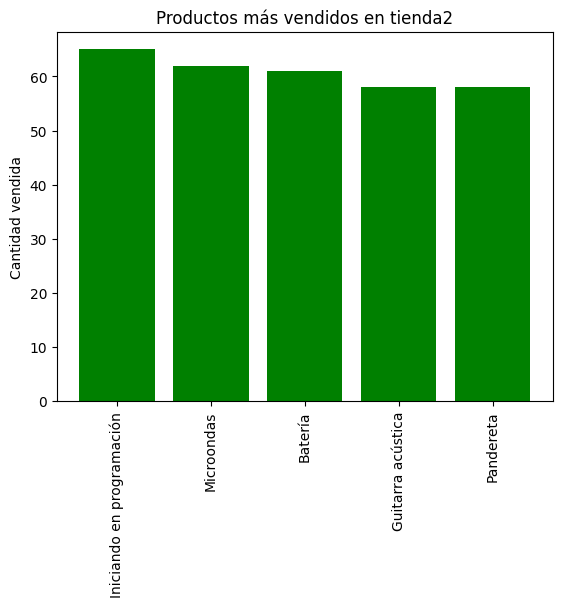

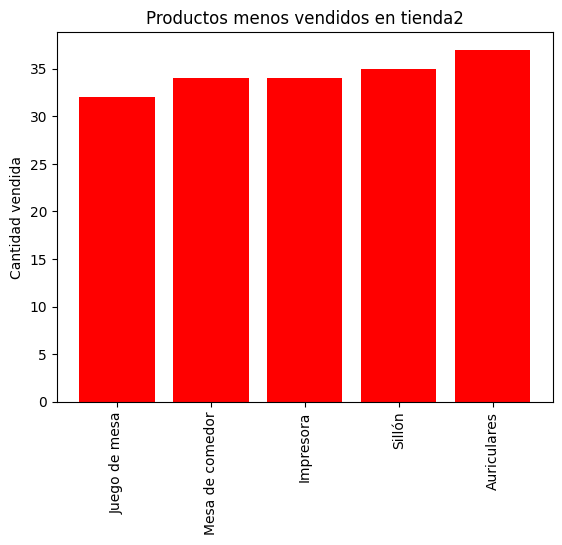

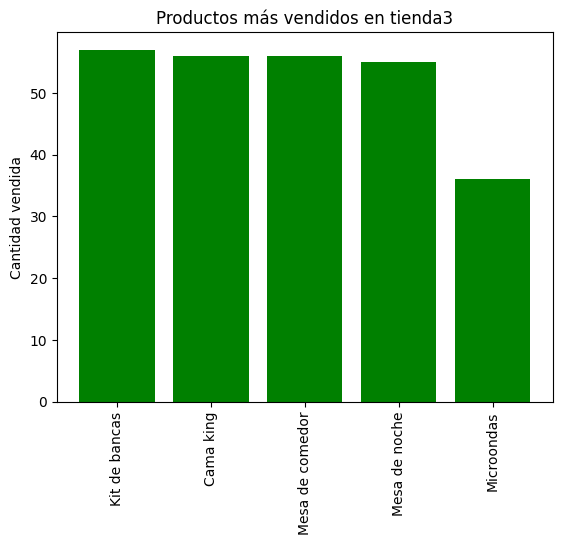

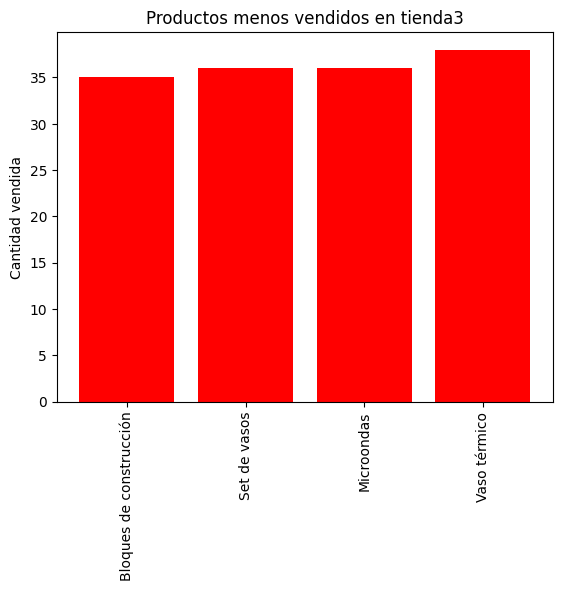

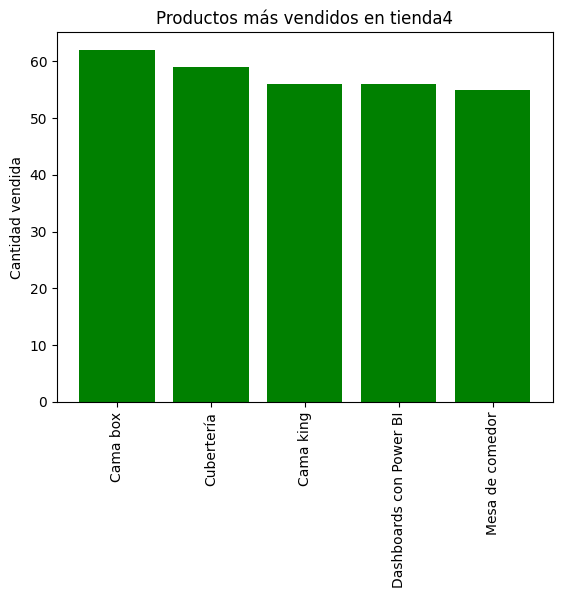

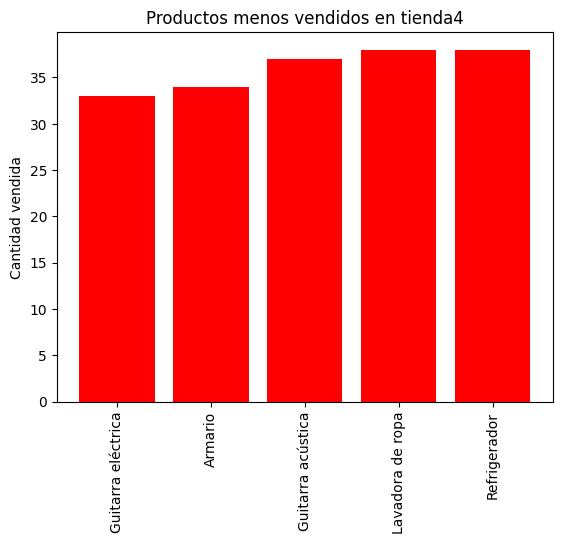

In [12]:
for tienda in tiendas_llave:
  plt.bar(productos_mas_tiendas[tienda].keys(), productos_mas_tiendas[tienda].values(), color='green')
  plt.title(f"Productos más vendidos en {tienda}")
  plt.xticks(rotation=90)
  plt.ylabel("Cantidad vendida")
  plt.show()

  plt.bar(productos_menos_tiendas[tienda].keys(), productos_menos_tiendas[tienda].values(), color='red')
  plt.title(f"Productos menos vendidos en {tienda}")
  plt.xticks(rotation=90)
  plt.ylabel("Cantidad vendida")
  plt.show()

# 5. Envío promedio por tienda

In [38]:
envio_tiendas_millones = {tiendas_llave[i]: round((float(tiendas_lista[i]['Costo de envío'].sum()))/1_000_000,2) for i in range(0, len(tiendas_llave))}
print(envio_tiendas_millones)
envio_promedio_tiendas = {tiendas_llave[i]: round(float(tiendas_lista[i]['Costo de envío'].mean()),2) for i in range(0, len(tiendas_llave))}
print(envio_promedio_tiendas)

{'tienda1': 61.38, 'tienda2': 59.49, 'tienda3': 58.52, 'tienda4': 55.32}
{'tienda1': 26018.61, 'tienda2': 25216.24, 'tienda3': 24805.68, 'tienda4': 23459.46}


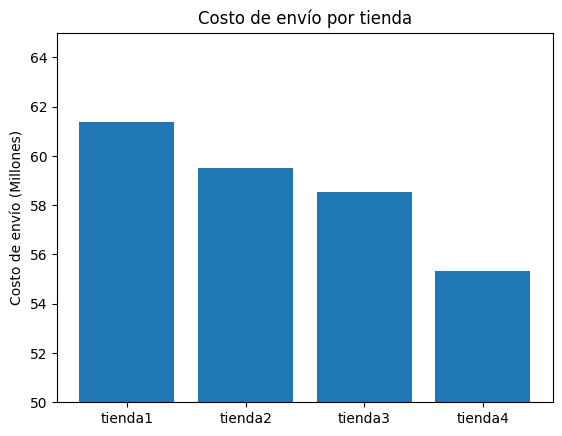

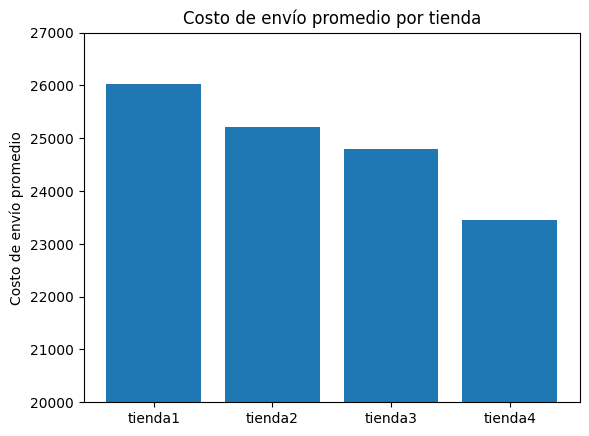

In [42]:
plt.bar(envio_tiendas_millones.keys(), envio_tiendas_millones.values())
plt.title("Costo de envío por tienda")
plt.ylabel("Costo de envío (Millones)")
plt.ylim(50,65)
plt.show()

plt.bar(envio_promedio_tiendas.keys(), envio_promedio_tiendas.values())
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío promedio")
plt.ylim(20000,27000)
plt.show()

# Extra: Análisis geográfico


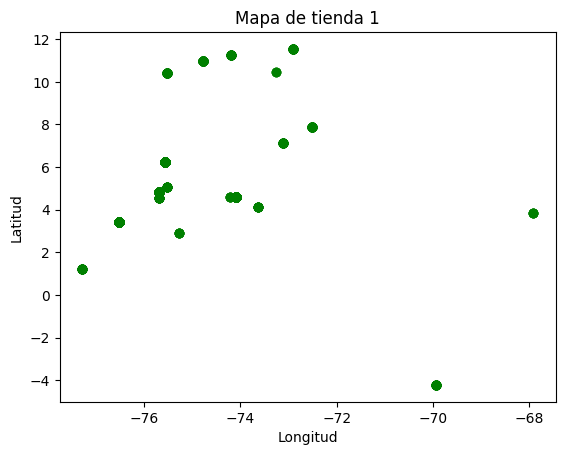

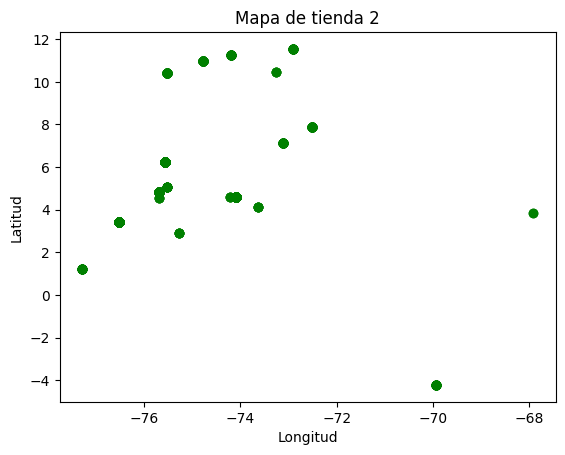

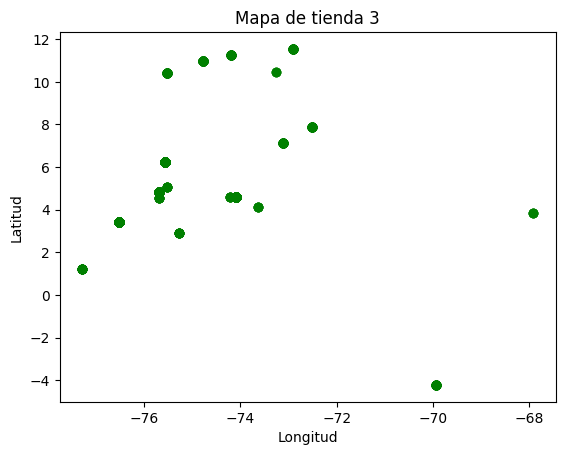

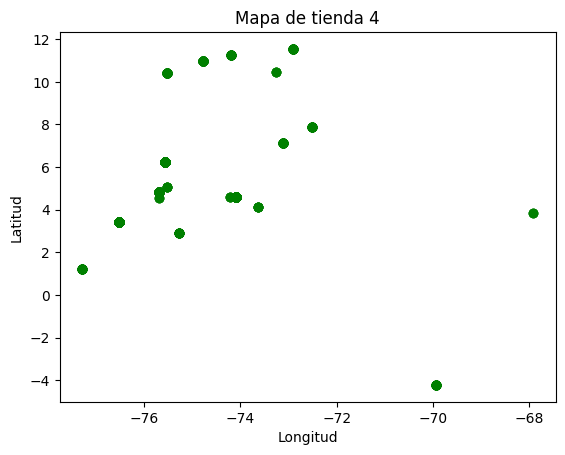

In [46]:
i=1
for tienda in tiendas_lista:
  plt.scatter(tienda['lon'], tienda['lat'], c='green')
  plt.title(f"Mapa de tienda {i}")
  plt.xlabel("Longitud")
  plt.ylabel("Latitud")
  plt.show()
  i+=1

In [48]:
calificaciones = {tiendas_llave[i]: round((calificacion_tiendas[tiendas_llave[i]]*5 + ingreso_total_plt[i]/1200 * 3 + ingreso_total_plt[i]/envio_tiendas_millones[tiendas_llave[i]]*2)/10,2) for i in range(0, len(tiendas_llave))}
print(calificaciones)

{'tienda1': 6.03, 'tienda2': 6.05, 'tienda3': 6.05, 'tienda4': 6.01}


# Informe final


## _Calificación ponderada_
Todas las tiendas obtienen resultados muy similares, y de igual forma en una **calificación ponderada**, con calificación con valor de 5 puntos, razón entre el ingreso total sobre 1200 con valor de 3 y la razón entre el ingreso y el costo de envío con valor de 2; obtienen calificaciones casi iguales.

## _Recomendación de no vender_
Por lo anterior, se puede llegar a la conclusión que no es lo más recomendable vender alguna tienda, sin embargo al tener que elegir una de las cuatro tiendas, ésta tendría que ser la Tienda 4.

## _Ingresos_
Lo anterior es reforzado desde un punto de vista de ingresos, siendo la tienda 4 la que **menores ingresos** obtuvo, siendo de **_1038.37 Millones_**. Mientras que la tienda 1, la de mayores ingresos fueron de: **_1150.88 Millones_**, una diferencia de 112 Millones

## _Calificación de clientes_
Además de eso, tiene una calificación de **_4.0_**, siendo la segunda menor de todas. La menor calificación de todas la tiene la tienda 1 con **_3.98_**, sin embargo, también es la tienda de mayores ingresos.

## _Costos de envío_
Para el envío la tienda 4 es la que menos costos tuvo con **_55.32 Millones_**, sin embargo; la tienda 1, con los mayores costos de envío fue de: **_61.38_** Millones. Siendo la diferencia de 6 Millones, que comparando con la diferencia de ingresos, se puede interpretar un exceso en el costo de envío.

## _Mapa de ventas_
El costo excesivo del envío se **confirma** gráficamente al observar el mapa de ubicaciones de ambas tiendas (y también de las demás), puesto que las ubicaciones son sumamente similares.

#Para concluir y en base a los puntos anteriores, la tienda que debe ser vendida es: **_Tienda 4_**